In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import yaml

In [2]:
data_pre = '/p/vast1/karande1/heavyIon/results/nearest_config_'

In [3]:
num_folds = 4
num_configs = 112

val_losses = []
val_regress_losses = []
val_class_losses = []
val_class_accuracy = []
val_losses_pi0 = []
val_losses_pion = []

for i in range(num_configs):
    config_val_loss = []
    config_val_regress_loss = []
    config_val_class_loss = []
    config_val_class_acc = []
    config_val_loss_pi0 = []
    config_val_loss_pion = []
    
    for j in range(num_folds):
        file = data_pre + '{}_fold_{}/losses.npz'.format(i, j)
        config_val_loss.append(np.load(file)['validation'].mean(axis=-1)[-1])
        config_val_regress_loss.append(np.load(file)['validation_regress'].mean(axis=-1)[-1])
        config_val_class_loss.append(np.load(file)['validation_class'].mean(axis=-1)[-1])
        
        preds = np.load(data_pre + '{}_fold_{}/predictions.npz'.format(i, j))
        targets = preds['targets']
        outputs = preds['outputs']
        acc = np.mean(targets[:,1]==(outputs[:, 1]>.5))
        config_val_class_acc.append(acc)
        
        pi0_inds = (targets[:,1] == 0)
        pi0_mae = np.mean(np.abs(np.log10(targets[pi0_inds,0]) - np.log10(outputs[pi0_inds,0])))
        pion_mae = np.mean(np.abs(np.log10(targets[~pi0_inds,0]) - np.log10(outputs[~pi0_inds,0])))
        
        config_val_loss_pi0.append(pi0_mae)
        config_val_loss_pion.append(pion_mae)
    
    config_val_loss = np.array(config_val_loss)
    config_val_regress_loss = np.array(config_val_regress_loss)
    config_val_class_loss = np.array(config_val_class_loss)
    config_val_class_acc = np.array(config_val_class_acc)
    config_val_loss_pi0 = np.array(config_val_loss_pi0)
    config_val_loss_pion = np.array(config_val_loss_pion)
    
    val_losses.append([config_val_loss.mean(), 
                       config_val_loss.mean() - config_val_loss.min(), 
                       config_val_loss.max() - config_val_loss.mean()])
    val_regress_losses.append([config_val_regress_loss.mean(), 
                               config_val_regress_loss.mean() - config_val_regress_loss.min(), 
                               config_val_regress_loss.max() - config_val_regress_loss.mean()])
    val_class_losses.append([config_val_class_loss.mean(), 
                             config_val_class_loss.mean() - config_val_class_loss.min(), 
                             config_val_class_loss.max() - config_val_class_loss.mean()])
    
    val_class_accuracy.append([config_val_class_acc.mean(), 
                               config_val_class_acc.mean() - config_val_class_acc.min(), 
                               config_val_class_acc.max() - config_val_class_acc.mean()])
    
    val_losses_pi0.append([config_val_loss_pi0.mean(), 
                           config_val_loss_pi0.mean() - config_val_loss_pi0.min(), 
                           config_val_loss_pi0.max() - config_val_loss_pi0.mean()])
    val_losses_pion.append([config_val_loss_pion.mean(), 
                            config_val_loss_pion.mean() - config_val_loss_pion.min(), 
                            config_val_loss_pion.max() - config_val_loss_pion.mean()])

    
val_losses = np.array(val_losses)
val_regress_losses = np.array(val_regress_losses)
val_class_losses = np.array(val_class_losses)
val_class_accuracy = np.array(val_class_accuracy)
val_losses_pi0 = np.array(val_losses_pi0)
val_losses_pion = np.array(val_losses_pion)

In [4]:
acc = np.mean(targets[:,1]==(outputs[:, 1]>.5))
acc

0.6306111168935579

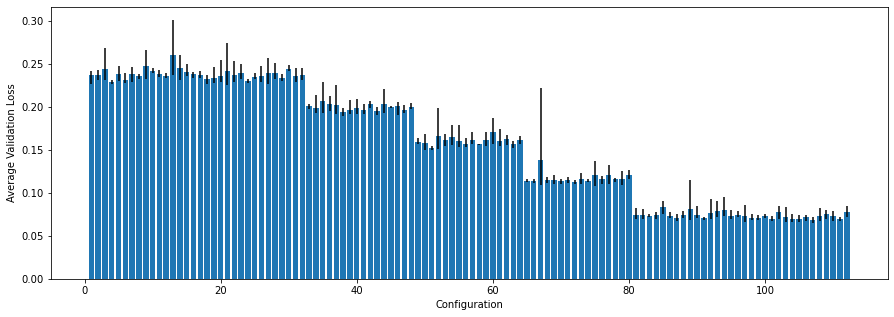

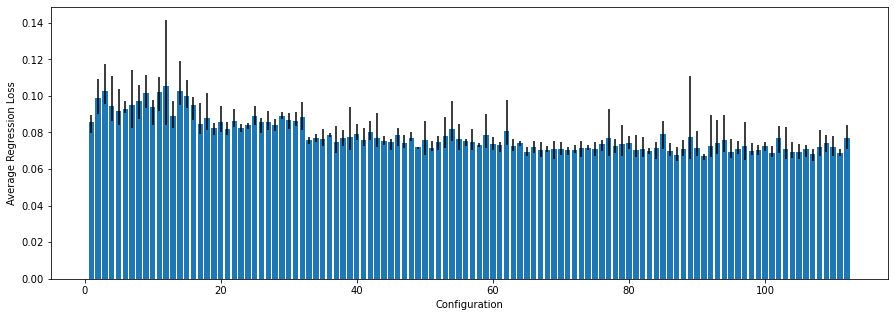

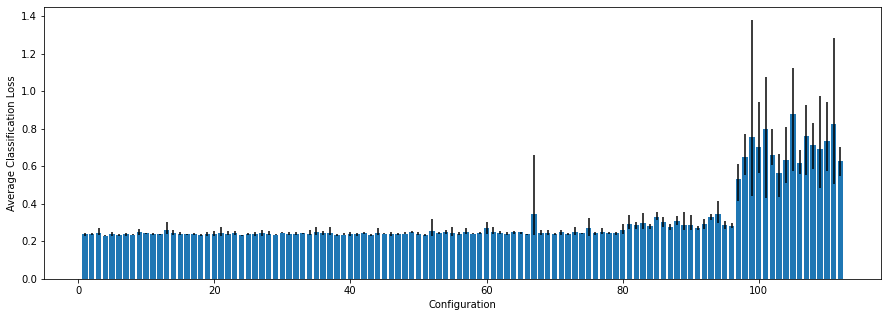

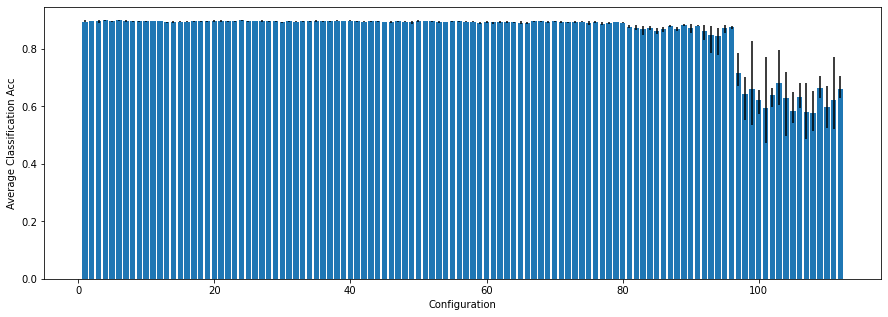

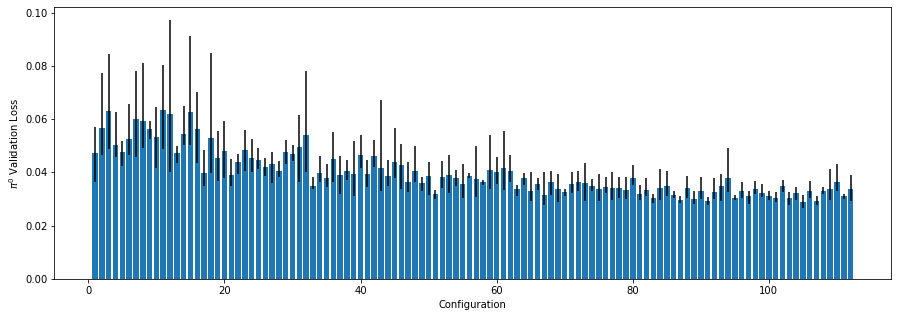

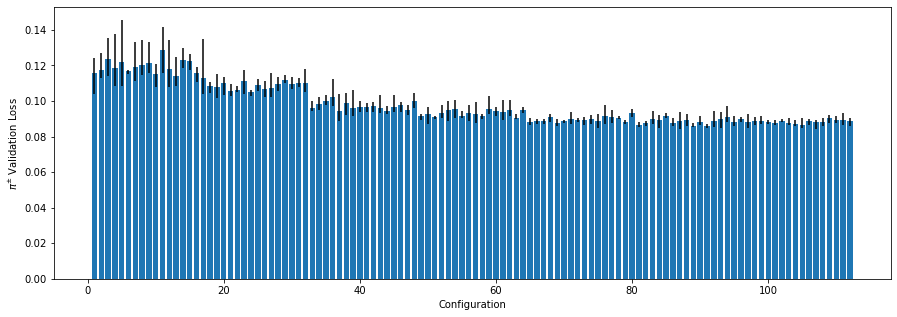

In [12]:
plt.figure(figsize=(15,5))
plt.bar(np.arange(num_configs)+1, val_losses[:,0], yerr=val_losses[:,1:].T, align='center')
# plt.xticks(ticks=np.arange(num_configs)+1)
plt.xlabel('Configuration')
plt.ylabel('Average Validation Loss')
plt.show()

plt.figure(figsize=(15,5))
plt.bar(np.arange(num_configs)+1, val_regress_losses[:,0], yerr=val_regress_losses[:,1:].T, align='center')
# plt.xticks(ticks=np.arange(num_configs)+1)
plt.xlabel('Configuration')
plt.ylabel('Average Regression Loss')
plt.show()

plt.figure(figsize=(15,5))
plt.bar(np.arange(num_configs)+1, val_class_losses[:,0], yerr=val_class_losses[:,1:].T, align='center')
# plt.xticks(ticks=np.arange(num_configs)+1)
plt.xlabel('Configuration')
plt.ylabel('Average Classification Loss')
plt.show()

plt.figure(figsize=(15,5))
plt.bar(np.arange(num_configs)+1, val_class_accuracy[:,0], yerr=val_class_accuracy[:,1:].T, align='center')
# plt.xticks(ticks=np.arange(num_configs)+1)
plt.xlabel('Configuration')
plt.ylabel('Average Classification Acc')
plt.show()

plt.figure(figsize=(15,5))
plt.bar(np.arange(num_configs)+1, val_losses_pi0[:,0], yerr=val_losses_pi0[:,1:].T, align='center')
# plt.xticks(ticks=np.arange(num_configs)+1)
plt.xlabel('Configuration')
plt.ylabel('$\\pi^{0}$ Validation Loss')
plt.show()

plt.figure(figsize=(15,5))
plt.bar(np.arange(num_configs)+1, val_losses_pion[:,0], yerr=val_losses_pion[:,1:].T, align='center')
# plt.xticks(ticks=np.arange(num_configs)+1)
plt.xlabel('Configuration')
plt.ylabel('$\\pi^{\\pm}$ Validation Loss')
plt.show()

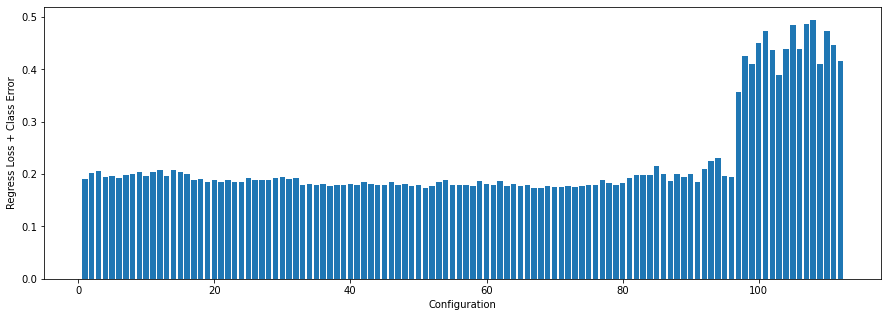

In [13]:
test = val_regress_losses[:,0] + 1 - val_class_accuracy[:, 0]
plt.figure(figsize=(15,5))
plt.bar(np.arange(num_configs)+1, test, align='center')
# plt.xticks(ticks=np.arange(num_configs)+1)
plt.xlabel('Configuration')
plt.ylabel('Regress Loss + Class Error')
plt.show()

In [16]:
min_ind = np.argmin(test)
print(min_ind, test[min_ind], val_regress_losses[min_ind, 0], 
      val_class_accuracy[min_ind, 0], val_class_losses[min_ind, 0])

66 0.17325959335058827 0.07031123 0.8970515953472267 0.3429733


In [67]:
min_ind = 67
print(min_ind, test[min_ind], val_regress_losses[min_ind, 0], 
      val_class_accuracy[min_ind, 0], val_class_losses[min_ind, 0])

67 0.17373759866888938 0.07052756 0.8967899548894602 0.24585515


In [69]:
min_ind = 71
print(min_ind, test[min_ind], val_regress_losses[min_ind, 0], 
      val_class_accuracy[min_ind, 0], val_class_losses[min_ind, 0])

71 0.17638792197331354 0.07052392 0.8941360553063495 0.23993519


In [8]:
config_files = [yaml.load(open(data_pre+'{}_fold_0/config.yaml'.format(i), 'r')) for i in range(num_configs)]

/usr/workspace/karande1/opence/lib/python3.7/site-packages/ipykernel_launcher.py:1: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  """Entry point for launching an IPython kernel.


In [9]:
for i, c in enumerate(config_files):
    alpha = c['training']['alpha']
    k = c['data']['k']
    use_xyz = c['data']['use_xyz']
    reducer = c['model']['reducer']
    print('i: {}, alpha: {:.5f}, k: {}, use_xyz: {}, reducer: {}'.format(i, alpha, k, use_xyz, reducer))

i: 0, alpha: 0.00098, k: 4, use_xyz: True, reducer: mean
i: 1, alpha: 0.00098, k: 4, use_xyz: True, reducer: sum
i: 2, alpha: 0.00098, k: 4, use_xyz: False, reducer: mean
i: 3, alpha: 0.00098, k: 4, use_xyz: False, reducer: sum
i: 4, alpha: 0.00098, k: 6, use_xyz: True, reducer: mean
i: 5, alpha: 0.00098, k: 6, use_xyz: True, reducer: sum
i: 6, alpha: 0.00098, k: 6, use_xyz: False, reducer: mean
i: 7, alpha: 0.00098, k: 6, use_xyz: False, reducer: sum
i: 8, alpha: 0.00098, k: 8, use_xyz: True, reducer: mean
i: 9, alpha: 0.00098, k: 8, use_xyz: True, reducer: sum
i: 10, alpha: 0.00098, k: 8, use_xyz: False, reducer: mean
i: 11, alpha: 0.00098, k: 8, use_xyz: False, reducer: sum
i: 12, alpha: 0.00098, k: 10, use_xyz: True, reducer: mean
i: 13, alpha: 0.00098, k: 10, use_xyz: True, reducer: sum
i: 14, alpha: 0.00098, k: 10, use_xyz: False, reducer: mean
i: 15, alpha: 0.00098, k: 10, use_xyz: False, reducer: sum
i: 16, alpha: 0.01562, k: 4, use_xyz: True, reducer: mean
i: 17, alpha: 0.0156

In [72]:
alphas = [2**(-i) for i in range(2, 11, 4)] + [1-2**(-i) for i in range(2, 11, 4)] + [0.5]
alphas.sort()
alphas = ['{:1.1e}'.format(a) for a in alphas]
alphas = {a: [] for a in alphas}
k = {4: [], 6: [], 8: [], 10: []}
use_xyz = {True: [], False: []}
reducer = {'mean': [], 'sum': []}

for i, config in enumerate(config_files):
    alphas['{:1.1e}'.format(config['training']['alpha'])].append(val_class_losses[i, 0])
    
    k[config['data']['k']].append(val_losses[i, 0])
    use_xyz[config['data']['use_xyz']].append(val_losses[i, 0])
    
    reducer[config['model']['reducer']].append(val_losses[i, 0])

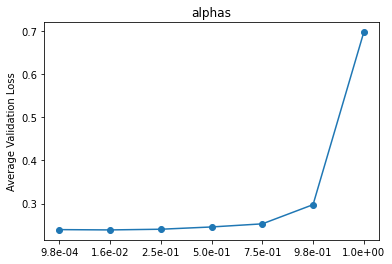

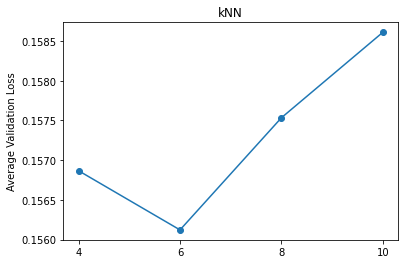

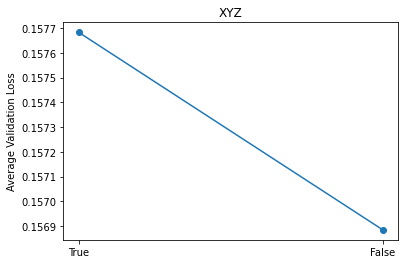

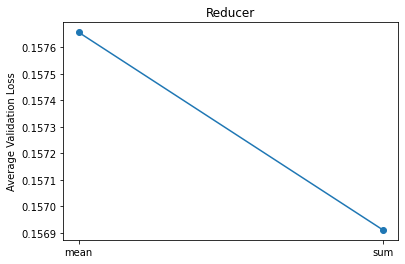

In [73]:
titles = ['alphas', 'kNN', 'XYZ', 'Reducer']
opts = [alphas, k, use_xyz, reducer]

for title, data in zip(titles, opts):
    num_opts = len(data.keys())
    opt_means = [np.mean(losses) for losses in data.values()]
    opt_stds = [np.std(losses) for losses in data.values()]

    plt.errorbar(np.arange(len(data.keys())), opt_means, linestyle='-', marker='o')  # , yerr=opt_stds)  # , align='center')
    plt.xticks(ticks=np.arange(num_opts), labels=data.keys())
    plt.title(title)
    plt.ylabel('Average Validation Loss')
    plt.show()